In [1]:
# Importing the relevant libraries
import IPython.display
import pandas as pd
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib import pyplot as plt

In [2]:
items = pd.read_csv("../input/items.csv")
holiday_events = pd.read_csv("../input/holidays_events.csv")
stores = pd.read_csv("../input/stores.csv")
oil = pd.read_csv("../input/oil.csv")
transactions = pd.read_csv("../input/transactions.csv",parse_dates=['date'])
train = pd.read_csv("../input/train.csv", parse_dates=['date'])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
print(train.shape)
train.head()

(125497040, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [4]:
# Check for NULL values in all files
print("Nulls in train: {0} => {1}".format(train.columns.values, train.isnull().any().values))
print('---')
print("Nulls in oil: {0} => {1}".format(oil.columns.values,oil.isnull().any().values))
print('---')
print("Nulls in holiday_events: {0} => {1}".format(holiday_events.columns.values,holiday_events.isnull().any().values))
print('---')
print("Nulls in stores: {0} => {1}".format(stores.columns.values,stores.isnull().any().values))
print('---')
print("Nulls in transactions: {0} => {1}".format(transactions.columns.values,transactions.isnull().any().values))

Nulls in train: ['id' 'date' 'store_nbr' 'item_nbr' 'unit_sales' 'onpromotion'] => [False False False False False  True]
---
Nulls in oil: ['date' 'dcoilwtico'] => [False  True]
---
Nulls in holiday_events: ['date' 'type' 'locale' 'locale_name' 'description' 'transferred'] => [False False False False False False]
---
Nulls in stores: ['store_nbr' 'city' 'state' 'type' 'cluster'] => [False False False False False]
---
Nulls in transactions: ['date' 'store_nbr' 'transactions'] => [False False False]


In [5]:
# EDA for oil.csv begins here #
oil.head(3)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


In [6]:
# Plotting graph for oil price trends
trace = go.Scatter(
    name='Oil prices',
    x=oil['date'],
    y=oil['dcoilwtico'].dropna(),
    mode='lines',
   )

data = [trace]

layout = go.Layout(
    yaxis = dict(title = 'Daily Oil price'),
    showlegend = True)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='pandas-time-series-error-bars')

In [7]:
# EDA for holiday_events.csv begins here #
holiday_events.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


In [8]:
holiday_events.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'], dtype=object)

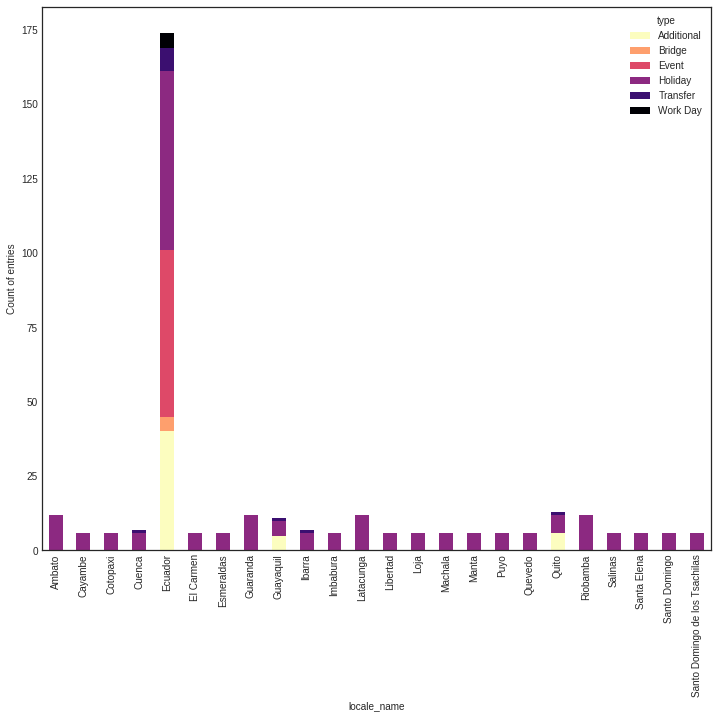

In [9]:
plt.style.use('seaborn-white')
holiday_local_type = holiday_events.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.ylabel('Count of entries')
plt.show()

In [10]:
# EDA for items.csv begins here
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [11]:
# BAR PLOT FOR ITEMS V/S FAMILY TYPE
x, y = (list(x) for x in zip(*sorted(zip(items.family.value_counts().index, 
                                         items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y = items.family.value_counts().values,
    x = items.family.value_counts().index
)

layout = dict(
    title='Counts of items per family category',
     width = 900, height = 600,
    yaxis=dict(
        showgrid = True,
        showline = True,
        showticklabels = True
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

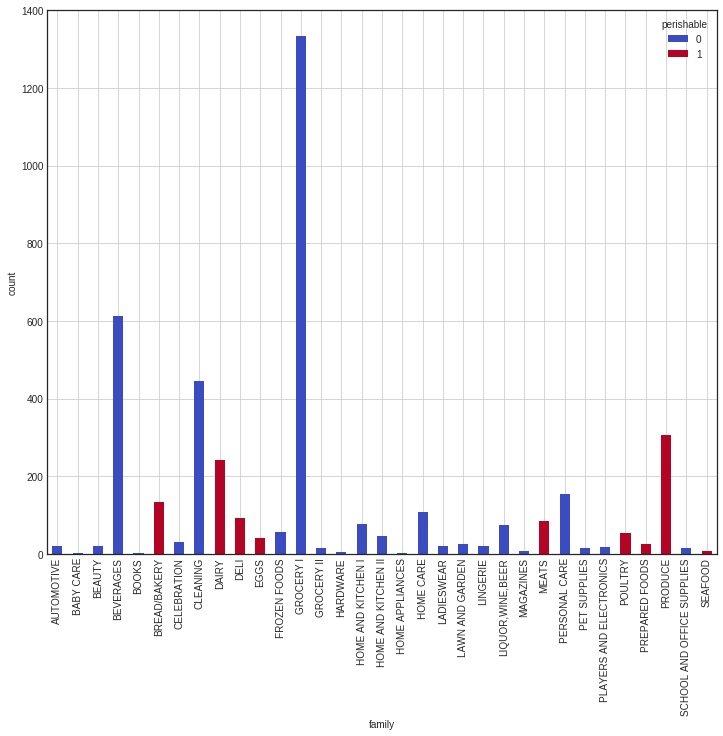

In [12]:
# Persihable or not 
plt.style.use('seaborn-white')
fam_perishable = items.groupby(['family', 'perishable']).size()
fam_perishable.unstack().plot(kind='bar',stacked=True, colormap = 'coolwarm', figsize=(12,10),  grid = True)
plt.ylabel('count')
plt.show()

In [13]:
# EDA for stores.csv begins here #
stores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


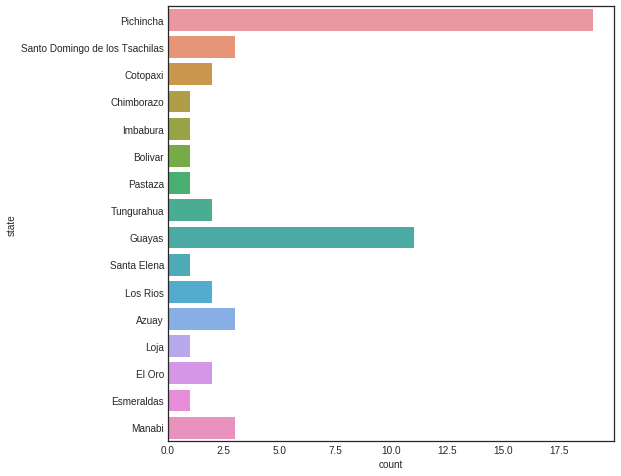

In [14]:
# store distribution across states
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.countplot(y = stores['state'], data = stores) 

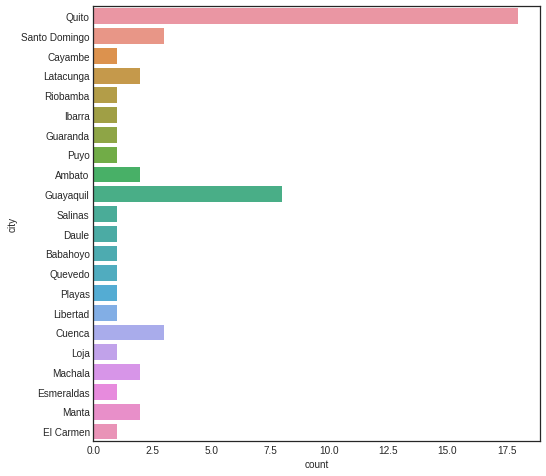

In [15]:
# store distribution across cities
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.countplot(y = stores['city'], data = stores) 

In [16]:
# Unique state names
stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [17]:
# Unique state names
stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'], dtype=object)

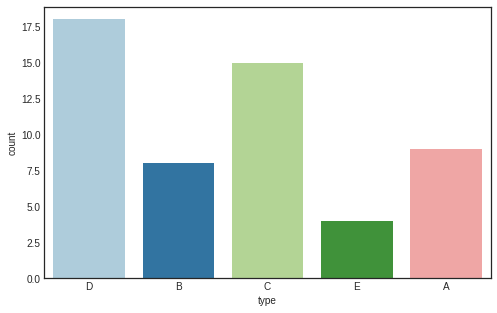

In [18]:
# Various types of stores and their count
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax = sns.countplot(x = "type", data = stores, palette="Paired")

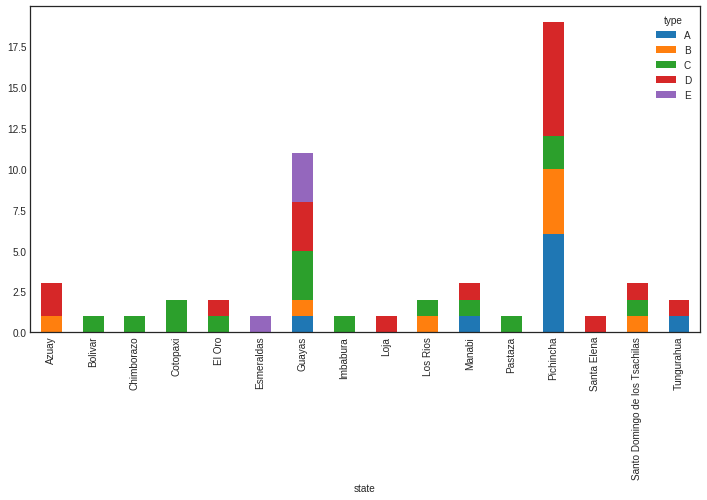

In [19]:
ct = pd.crosstab(stores.state, stores.type)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.legend(title='type')
plt.show()

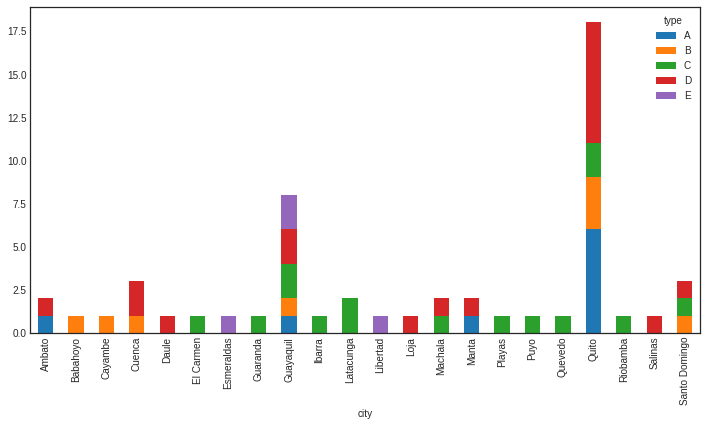

In [20]:
ct = pd.crosstab(stores.city, stores.type)

ct.plot.bar(figsize = (12, 6), stacked=True)
plt.legend(title='type')

plt.show()

In [21]:
# total no. of unique stores 
stores.store_nbr.nunique()

54

In [22]:
# total no. of stores (including non-unique)
stores.cluster.sum()

458

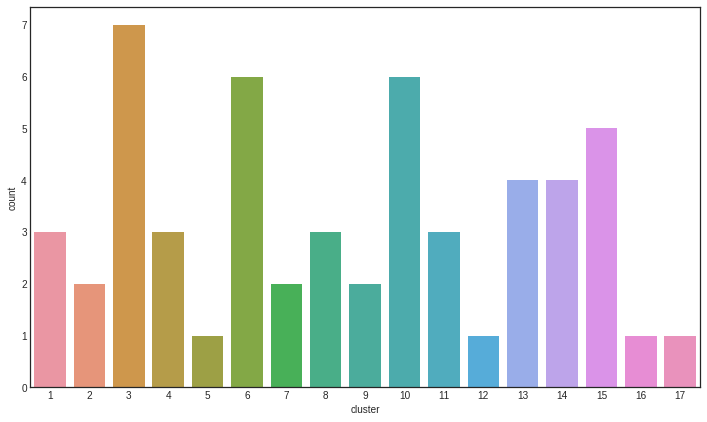

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
ax = sns.countplot(x = "cluster", data = stores)

In [24]:
# EDA for transactions.csv begins here #
transactions.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [25]:
# Finding out the no.of transactions (rows)
print("There are {0} transactions".
      format(transactions.shape[0], transactions.shape[1]))

There are 83488 transactions


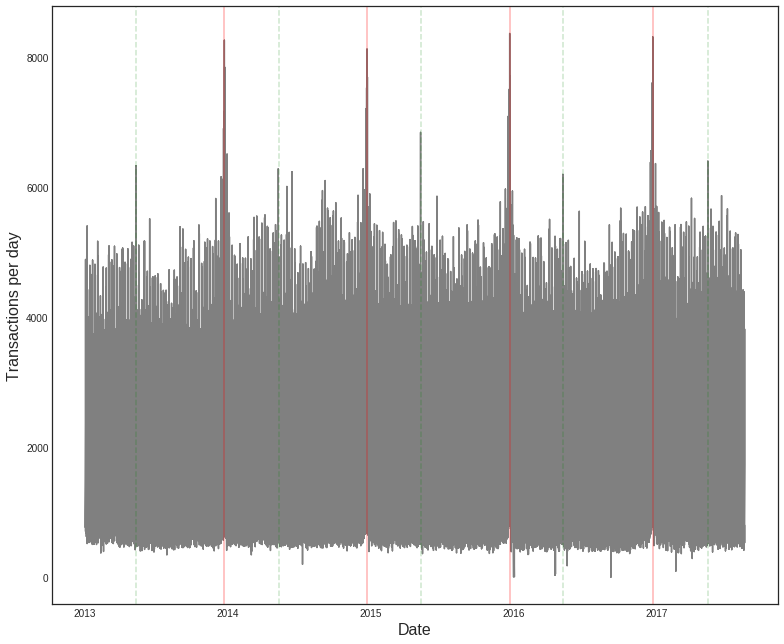

In [26]:
# Time series plot for transaction #
plt.style.use('seaborn-white')
plt.figure(figsize=(13,11))
plt.plot(transactions.date.values, transactions.transactions.values, color='grey')
plt.axvline(x='2015-12-23',color='red',alpha=0.3)
plt.axvline(x='2016-12-23',color='red',alpha=0.3)
plt.axvline(x='2014-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-12-23',color='red',alpha=0.3)
plt.axvline(x='2013-05-12',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2015-05-10',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2016-05-08',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2014-05-11',color='green',alpha=0.2, linestyle= '--')
plt.axvline(x='2017-05-14',color='green',alpha=0.2, linestyle= '--')
plt.ylabel('Transactions per day', fontsize= 16)
plt.xlabel('Date', fontsize= 16)
plt.show()